# **Heart Disease Prediction**

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Activation, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

**Import & Analyze data**

In [2]:
heart_data= pd.read_csv('/content/heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
heart_data.corr().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [3]:
print(heart_data.isnull().sum())
heart_data.dropna(inplace=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
heart_data.drop(columns=['oldpeak','slope','thal','restecg','thalach','ca'],inplace=True)
y= heart_data['target']
X= heart_data.drop(columns='target',inplace=False,axis=0)
X

,age,sex,cp,trestbps,chol,fbs,exang
0,63,1,3,145,233,1,0
1,37,1,2,130,250,0,0
2,41,0,1,130,204,0,0
3,56,1,1,120,236,0,0
4,57,0,0,120,354,0,1
...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1
299,45,1,3,110,264,0,0
300,68,1,0,144,193,1,0
301,57,1,0,130,131,0,1


In [5]:
#scale X
scaler= StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-0.696631
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,-0.696631
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-0.696631
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,-0.696631
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,1.435481
...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,1.435481
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,-0.696631
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,-0.696631
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,1.435481


In [6]:
X_train,X_valid,y_train,y_valid= train_test_split(X,y,test_size=0.13,random_state=0)

**ML Model**

In [23]:
model= Sequential([
    Dense(100,activation='relu',input_shape=[7]),
    # Dense(100,activation='relu'),
    # Dense(200,activation='relu'),
    # Dense(100,activation='relu'),
    # Dense(300,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)


In [24]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=25,
    epochs=90,
    callbacks=[early_stopping],
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/90
11/11 [==============================] - 1s 17ms/step - loss: 0.7336 - binary_accuracy: 0.3878 - val_loss: 0.7116 - val_binary_accuracy: 0.4750
Epoch 2/90
11/11 [==============================] - 0s 4ms/step - loss: 0.6699 - binary_accuracy: 0.5475 - val_loss: 0.6607 - val_binary_accuracy: 0.5750
Epoch 3/90
11/11 [==============================] - 0s 4ms/step - loss: 0.6206 - binary_accuracy: 0.7186 - val_loss: 0.6229 - val_binary_accuracy: 0.6750
Epoch 4/90
11/11 [==============================] - 0s 4ms/step - loss: 0.5818 - binary_accuracy: 0.7414 - val_loss: 0.5903 - val_binary_accuracy: 0.7000
Epoch 5/90
11/11 [==============================] - 0s 4ms/step - loss: 0.5533 - binary_accuracy: 0.7567 - val_loss: 0.5627 - val_binary_accuracy: 0.7750
Epoch 6/90
11/11 [==============================] - 0s 4ms/step - loss: 0.5295 - binary_accuracy: 0.7681 - val_loss: 0.5409 - val_binary_accuracy: 0.7750
Epoch 7/90
11/11 [==============================] - 0s 5ms/step - loss: 0.5

Best Validation Loss: 0.4611
Best Validation Accuracy: 0.8250


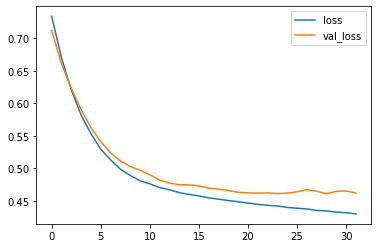

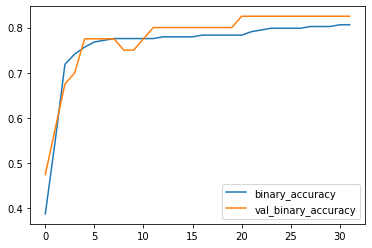

In [25]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [26]:
model.save("heart.h5")
loaded_model = load_model("heart.h5")
loss, accuracy = loaded_model.evaluate(X_valid, y_valid)
print(loss,accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.4619 - binary_accuracy: 0.8250
0.46186017990112305 0.824999988079071


In [28]:
model_filename='heart.pkl'
pickle.dump(model, open(model_filename,'wb'))

INFO:tensorflow:Assets written to: ram://1c7ec986-d162-4183-a3be-832fe1122b90/assets
